In [1]:
# The South Atlantic region Abigail is asking for has indices isel(face=1, i=(slice(600,1350), j=slice(1950,2850),k=slice(0,45)) (I added a small margin around the outside to be safe). A single timeslice with all five variables (T,S,U,V,W) should be ~0.5GB.

In [1]:
ls /nobackup/sraza2/ # we will dump file to upload to OSN to pfe_to_osn

README  blah/  pfe_to_osn/


In [2]:
!du -sh /nobackup/sraza2/pfe_to_osn
!ls /nobackup/sraza2/pfe_to_osn | wc -l

6.7G	/nobackup/sraza2/pfe_to_osn
64


In [3]:
import dask
dask.config.set(**{'array.slicing.split_large_chunks': False})

In [4]:
%%time
from xmitgcm import llcreader
import os
from os.path import abspath, expanduser, expandvars

def _expand_path(path: str) -> str:
    """
    :path: A path on the filesystem.
    :return: An expanded path
    """
    # expanduser -> expands "~" i.e., user's home directory
    # expandvars -> expands environment variables like $HOME
    # abspath -> expands a relative path to an absolute path
    return abspath(expanduser(expandvars(path)))

model_name = 'llc4320'
model = llcreader.PleiadesLLC4320Model()

varnames = ['Eta',
            'Theta',
            'U',
            'V',
            'W']
klevel = list(range(10))
NUM_TEST_FILES = 100
iters = [390528 + 144 * hour for hour in range(NUM_TEST_FILES)]
out_dir = '/nobackup/sraza2/pfe_to_osn'
facen = [1]
istart = 600
iend = 1350
jstart = 1950
jend = 2850
is_fdepth = True


for i, iter in enumerate(iters):
    # Construct a filename based on arguments
    var_names = '-'.join(vars for vars in varnames)
    k_names = '-'.join(str(klev) for klev in klevel)
    fname = f'{model_name}_'+var_names+'_k'+k_names+f'_iter_{iter}.nc'
    path = _expand_path(os.path.join(out_dir, fname))
    if os.path.exists(path):
        print(i, path)
        continue
    ds = model.get_dataset(varnames=varnames, iters=[iter], k_levels=klevel, read_grid=False)
    ds_sel = ds.sel(face=facen)
    ds_isel = ds_sel.isel(i=slice(istart, iend),
                          i_g=slice(istart, iend),
                          j=slice(jstart, jend),
                          j_g=slice(jstart, jend))
    print(i, path)
    ds_isel.to_netcdf(path)

0 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390528.nc
1 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390672.nc
2 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390816.nc
3 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390960.nc
4 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391104.nc
5 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391248.nc
6 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391392.nc
7 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391536.nc
8 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391680.nc
9 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391824.nc
10 /nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391968.nc
11 /nobac

In [ ]:
# from extract_llc import extract_llc, _expand_path
# import os
# from concurrent.futures import ProcessPoolExecutor, as_completed, wait
# from tqdm import tqdm

# model_name = 'llc4320'

# varnames = ['Eta',
#             'Theta',
#             'U',
#             'V',
#             'W']
# klevel = list(range(10))
# NUM_TEST_FILES = 100
# iters = [390528 + 144 * hour for hour in range(NUM_TEST_FILES)]
# out_dir = '/nobackup/sraza2/pfe_to_osn'
# facen = [1]
# istart = 600
# iend = 1350
# jstart = 1950
# jend = 2850
# is_fdepth = True
# is_verbose = False

# kwargs = []
# for iter in iters:
#     iter = [iter]
#     # Construct a filename based on arguments
#     var_names = '-'.join(vars for vars in varnames)
#     k_names = '-'.join(str(klev) for klev in klevel)
#     fname = f'{model_name}_'+var_names+'_k'+k_names+f'_iter_{iter[0]}.nc'
#     expanded_path = _expand_path(os.path.join(out_dir, fname))
#     kwargs.append(dict(model_name=model_name,
#                        varnames=varnames,
#                        klevel=klevel,
#                        iter=iter,
#                        path=expanded_path,
#                        facen=facen,
#                        istart=istart,
#                        iend=iend,
#                        jstart=jstart,
#                        jend=jend,
#                        fdepth=is_fdepth,
#                        verbose=is_verbose))

# with tqdm(total=len(kwargs)) as pbar:
#     with ProcessPoolExecutor(max_workers=16) as pool:
#         futures = [pool.submit(extract_llc, **kwarg) for kwarg in kwargs]
#         for future in as_completed(futures):
#             _ = future.result()
#             pbar.update(1)

## Above computation was done in Singularity running an interactive node (r401i1n12)

## Following was done on pfe as we don't have network access from interactive nodes

In [2]:
!hostname

pfe21


In [3]:
cd ~/nasa/

/home3/sraza2/nasa


In [5]:
ls test2.py

test2.py


In [14]:
# Motivated from: http://gallery.pangeo.io/repos/earthcube2020/ec20_abernathey_etal/cloud_storage.html#Big-Arrays,-Fast:-Profiling-Cloud-Storage-Read-Throughput
from contextlib import contextmanager
import pandas as pd
import time
import os

class DiagnosticTimer:
    def __init__(self):
        self.diagnostics = []

    @contextmanager
    def time(self, **kwargs):
        tic = time.time()
        yield
        toc = time.time()
        kwargs["runtime"] = toc - tic
        self.diagnostics.append(kwargs)

    def dataframe(self):
        return pd.DataFrame(self.diagnostics)

In [15]:
import sys
sys.path.append(".")

from concurrent.futures import ProcessPoolExecutor, as_completed
from test2 import upload_to_s3_cnh2

path = "/nobackup/sraza2/pfe_to_osn"

diag_timer = DiagnosticTimer()
for nworkers in [32, 16, 8, 4, 1]:
    print(nworkers)
    with ProcessPoolExecutor(max_workers=nworkers) as pool:
        with diag_timer.time(nworkers=nworkers):
            futures = [pool.submit(upload_to_s3_cnh2, os.path.join(path, f)) 
                       for f in os.listdir(path)]
            results = [f.result() for f in as_completed(futures)]

32


/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 wil

/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401184.nc uploaded by process 63960
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_392688.nc uploaded by process 63972
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390528.nc uploaded by process 63970
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390816.nc uploaded by process 63974
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_398448.nc uploaded by process 63966
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_404208.nc uploaded by process 63991
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_402480.nc uploaded by process 63969
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_395424.nc uploaded by process 63975
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_398160.nc 

/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 wil

/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401184.nc uploaded by process 66369
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_398592.nc uploaded by process 66380
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_402480.nc uploaded by process 66378
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_395712.nc uploaded by process 66373
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_400176.nc uploaded by process 66372
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401904.nc uploaded by process 66371
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390528.nc uploaded by process 66379/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391536.nc uploaded by process 66370

/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_404784.nc 

/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 wil

/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391536.nc uploaded by process 68468
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_393984.nc uploaded by process 68472
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401904.nc uploaded by process 68469
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_398448.nc uploaded by process 68473
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401184.nc uploaded by process 68467
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_403056.nc uploaded by process 68466
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_400176.nc uploaded by process 68470
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_395712.nc uploaded by process 68471
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_397152.nc 

/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)
/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 wil

/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401184.nc uploaded by process 71062
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401904.nc uploaded by process 71064
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_403056.nc uploaded by process 71061
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391536.nc uploaded by process 71063
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_395712.nc uploaded by process 71064
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_400176.nc uploaded by process 71062
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_393984.nc uploaded by process 71061
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_398448.nc uploaded by process 71063
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_397152.nc 

/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_403056.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401184.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391536.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_401904.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_400176.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_395712.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_393984.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_398448.nc uploaded by process 74188
/nobackup/sraza2/pfe_to_osn/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_397152.nc 

In [19]:
df = diag_timer.dataframe()
df

,nworkers,runtime
0,32,42.735367
1,16,35.812683
2,8,53.272684
3,4,89.494268
4,1,392.353805


In [22]:
import boto3

ACCESS_KEY = ''
SECRET_KEY = ''

if not ACCESS_KEY or not SECRET_KEY:
    raise ValueError("Populate Keys")

client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY,
    aws_secret_access_key=SECRET_KEY,
    endpoint_url='https://mghp.osn.xsede.org'
)

response = client.list_objects_v2(Bucket='cnh-bucket-1',
                                  Prefix ='rsaim/temp')
for res in response['Contents']:
    print(res['Key'], " Size=" + str(res['Size']))

/home3/sraza2/.local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


rsaim/temp/404.html  Size=118
rsaim/temp/README.md  Size=671
rsaim/temp/about.html  Size=205
rsaim/temp/app.js  Size=16
rsaim/temp/contact-me.html  Size=0
rsaim/temp/index.html  Size=293
rsaim/temp/index.js  Size=637
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390528.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390672.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390816.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_390960.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391104.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391248.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391392.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391536.nc  Size=110761973
rsaim/temp/llc4320_Eta-Theta-U-V-W_k0-1-2-3-4-5-6-7-8-9_iter_391680.nc  Size=110761973


In [23]:
def sizeof_fmt(num, suffix="B"):
    for unit in ["", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"]:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

sizeof_fmt(110761973)

'105.6MiB'

In [25]:
df

,nworkers,runtime
0,32,42.735367
1,16,35.812683
2,8,53.272684
3,4,89.494268
4,1,392.353805


In [28]:
!du -sh /nobackup/sraza2/pfe_to_osn/

11G	/nobackup/sraza2/pfe_to_osn/


In [32]:
df["total_mb"] = 11 * 1024 # MBs
df["throughput_MBps"] =  df.total_mb / df['runtime']
df

,nworkers,runtime,total_mb,throughput_MBps
0,32,42.735367,11264,263.575603
1,16,35.812683,11264,314.525445
2,8,53.272684,11264,211.440445
3,4,89.494268,11264,125.862810
4,1,392.353805,11264,28.708782


Text(0, 0.5, 'Time to upload to OSN (s)')

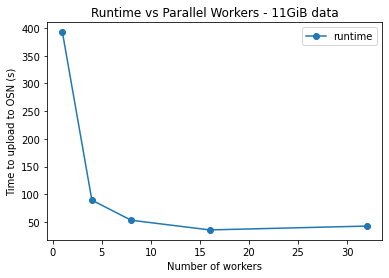

In [34]:
ax = df.plot(x='nworkers', y='runtime', marker='o', 
             title='Workers vs Runtime - 11GiB data')
ax.set_xlabel("Number of workers")
ax.set_ylabel("Time to upload to OSN (s)")

Text(0, 0.5, 'Throughput (MB/s)')

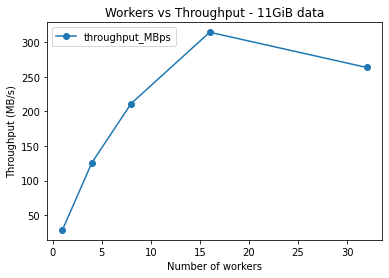

In [36]:
ax = df.plot(x='nworkers', y='throughput_MBps', marker='o', 
             title='Workers vs Throughput - 11GiB data')
ax.set_xlabel("Number of workers")
ax.set_ylabel("Throughput (MB/s)")